In [ ]:
pip install seaborn

In [32]:
import pandas as pd
from scipy.spatial.distance import euclidean
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [24]:
"""
Part 1: Intermediate Problem
Used website: https://towardsdatascience.com/a-simple-song-recommender-system-in-python-tutorial-3e4c111198d6
"""

data_url = 'https://gist.githubusercontent.com/jackbandy/5cd988ab5c3d95b79219364dce7ee5ae/raw/731ecdbecc7b33030f23cd919e6067dfbaf42feb/song-ratings.csv'
ratings = pd.read_csv(data_url,index_col=0)
ratings = pd.DataFrame(ratings)

def most_similar_to(name):
  person = ratings.loc[name]
  closest_distance=float('inf')
  closest_person=''
  for other_person in ratings.itertuples():
    if other_person.Index==name:
      # don't compare a person to themself
      continue
    distance_to_other_person = distance(person,ratings.loc[other_person.Index])
  if distance_to_other_person < closest_distance:
      # new high score! save it
      closest_distance = distance_to_other_person
      closest_person = other_person.Index
  return closest_person


def distance(person1,person2):
  distance = euclidean(person1,person2)
  return distance

ratings=ratings.fillna(0)
jack=ratings.loc['Jack']
nick=ratings.loc['Nick']
trevor=ratings.loc['Trevor']

print("Distance between Jack and Nick:")
print(distance(jack,nick))

print("Distance between Jack and Trevor:")
print(distance(jack,trevor))

print("Jack is most similar to:")
person_most_similar_to_jack = most_similar_to('Jack')
print(person_most_similar_to_jack)
print(distance(jack, ratings.loc[person_most_similar_to_jack]))

print(ratings.at[person_most_similar_to_jack, '7 Rings (Ariana Grande)'])

Distance between Jack and Nick:
9.327379053088816
Distance between Jack and Trevor:
13.490737563232042
Jack is most similar to:
Hallie
16.583123951777
0.0


(284807, 30)
(284807,)
------------------------------------------------------------------
The model used is Random Forest classifier
The accuracy is 0.9995786664794073
The precision is 0.9743589743589743
The recall is 0.7755102040816326
The F1-Score is 0.8636363636363635
The Matthews correlation coefficient is 0.8690748763736589


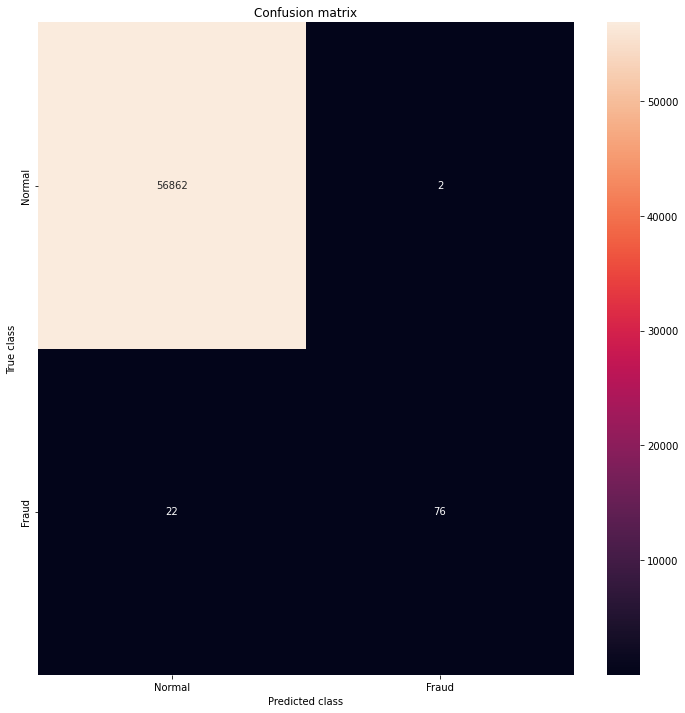

In [34]:
"""
Part 2: Advanced Problem
Used website: https://www.geeksforgeeks.org/ml-credit-card-fraud-detection/
"""

data = pd.read_csv("creditcard 2.csv")

# print(data.shape)
# print(data.describe())
"""
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

print("------------------------------------------------------------------")

print("Amount details of the fraudulent transaction")
print(fraud.Amount.describe())


print('details of valid transaction')
print(valid.Amount.describe())

print("------------------------------------------------------------------")


# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

print("------------------------------------------------------------------")
"""

# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

print("------------------------------------------------------------------")

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")
 

print("The accuracy is {}".format(accuracy_score(yTest, yPred)))


print("The precision is {}".format(precision_score(yTest, yPred)))
 

print("The recall is {}".format(recall_score(yTest, yPred)))
 
print("The F1-Score is {}".format(f1_score(yTest, yPred)))
 
print("The Matthews correlation coefficient is {}".format(matthews_corrcoef(yTest, yPred)))



# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()